## Confusion Matrix

Anomaly Detection 문제 (Normal(OK) or Abnormal(NG) 이진 분류 문제)  
• Accuracy (정확도) = 전체 데이터 중 AI가 정답을 맞춘 비율 (ACC)  
• Error Rate (오차율) = 전체 데이터 중 AI가 정답을 못 맞춘 비율 (ERR) = 1 - ACC  
• Precision (정밀도) = AI가 Positive로 말한 것 중 정답을 맞춘 비율 (PRC)  
• Sensitivity (민감도) = 실제 Positive 데이터 중 AI가 정답을 맞춘 비율   (SEN) = Recall (재현률)이라고도 함  
• Specificity (특이도) = 실제 Negative 데이터 중 AI가 정답을 맞춘 비율 (SPC)  
• False Positive Rate (불량율) = 제1종 과오 (Missing Alarm)의 비율 (FPR) = 1 – Specificity (SPC)  
• False Negative Rate (오검출율) = 제2종 과오 (False Alarm)의 비율 (FNR) = 1 – Sensitivity = 1 – Recall  

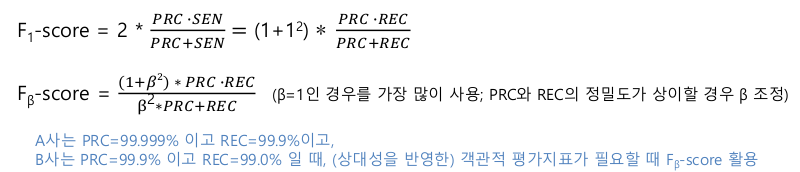

Confusion Matrix : 실제 Class 대비 예측 Class 결과를 한꺼번에 나타내는 Matrix  
Positive (= Normal Status) : 품질관리자가 유지하고자 하는 정상적인 상황 (OK)  
Negative (= Anomaly) : 품질관리자가 관여해야 하는 비정상적인 상황 (NG)  
False Positive (= Type I Error = Missing Error) : 장애가 발생하였는데 AI가 놓치는 상황 (FPR)  
False Negative (= Type II Error = False Alarm) : 장애가 아닌데 AI가 장애라고 보고하는 상황 (FNR)  

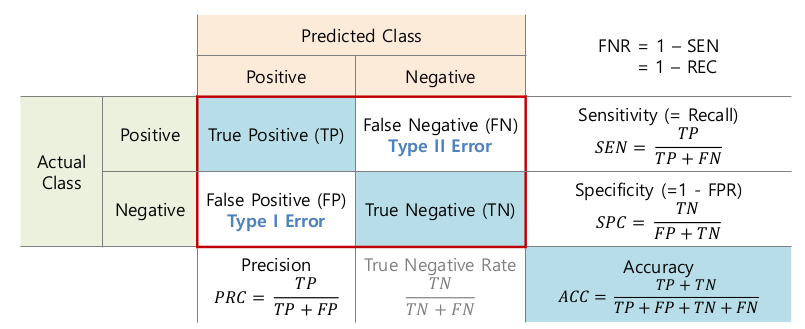

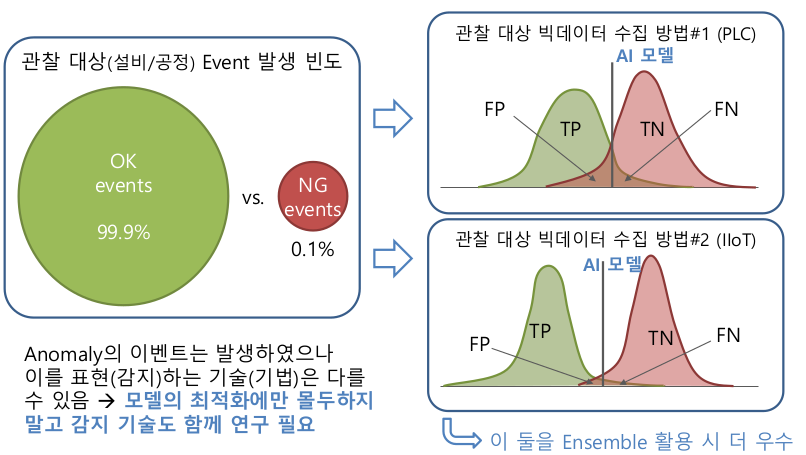

### AUC, ROC 그래프

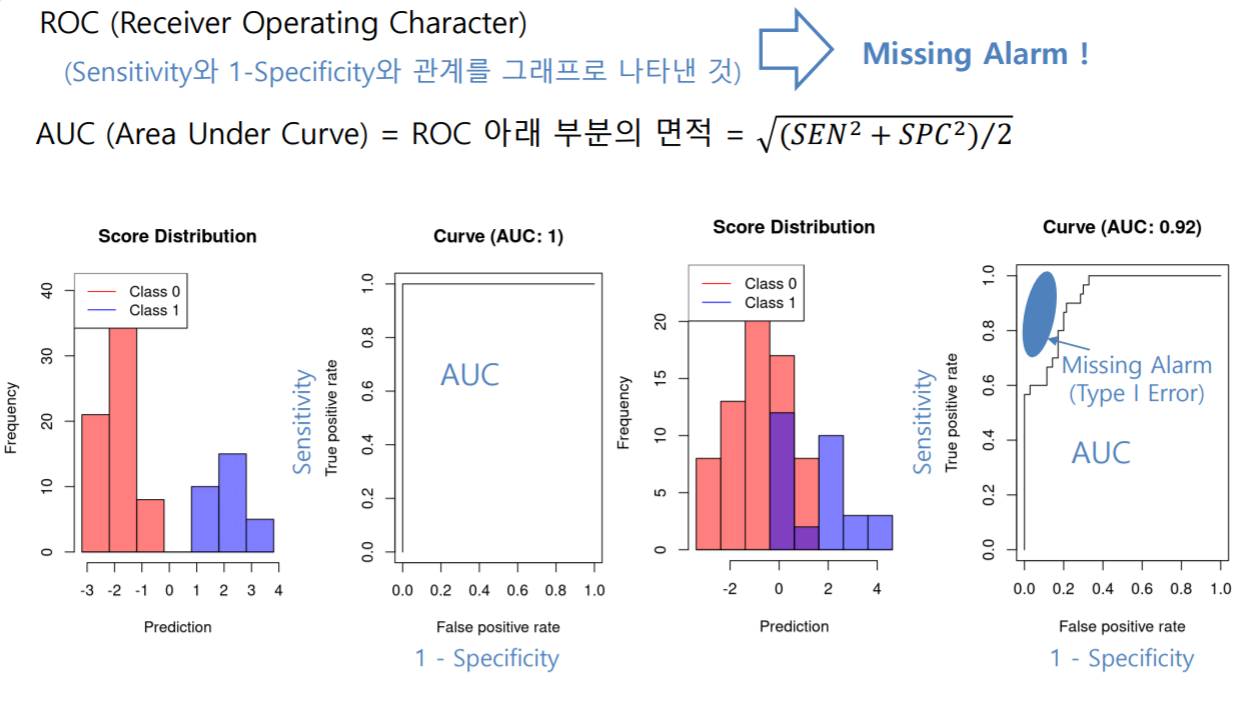

In [ ]:
%matplotlib inline

Automatically created module for IPython interactive environment


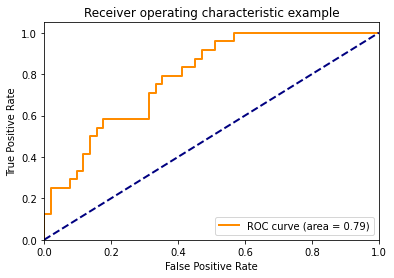

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


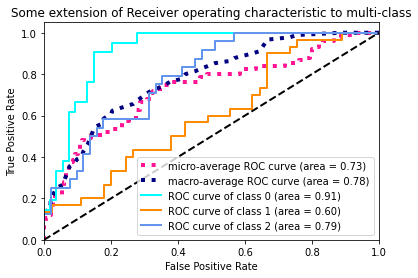

In [4]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
# append 200*n_features extra features along column direction
X1 = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

##############################################################################
# Plot of a ROC curve for a specific class
plt.figure(); linewidth = 2
# plot the last class ID
plt.plot(fpr[2], tpr[2], color='darkorange', lw=linewidth,label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


##############################################################################
# Plot ROC curves for the multiclass problem

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes # Finally average it and compute AUC

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=linewidth,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=linewidth)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

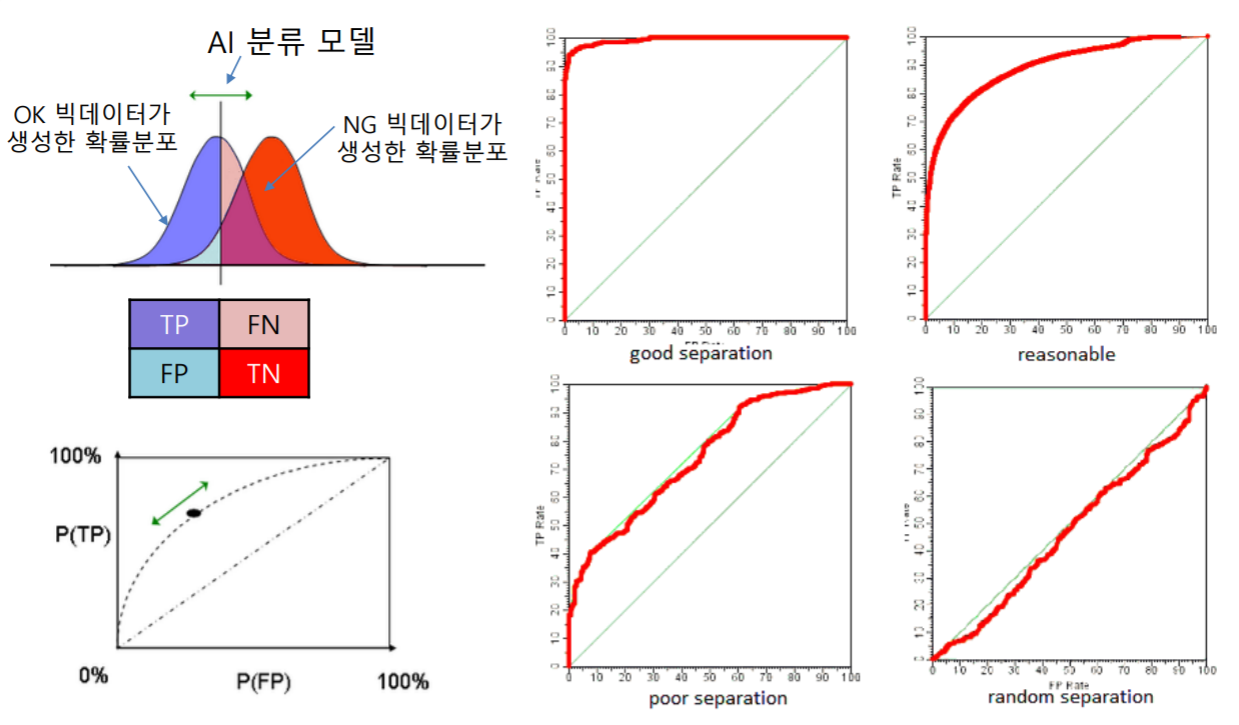

In [ ]:
X.shape

(150, 4)

In [ ]:
X1.shape

(150, 804)

In [ ]:
np.c_

In [ ]:
fpr

{0: array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
        0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
        0.07407407, 0.09259259, 0.09259259, 0.12962963, 0.12962963,
        0.14814815, 0.14814815, 0.2037037 , 0.2037037 , 0.27777778,
        0.27777778, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
        0.11111111, 0.11111111, 0.17777778, 0.17777778, 0.2       ,
        0.2       , 0.24444444, 0.24444444, 0.26666667, 0.26666667,
        0.37777778, 0.37777778, 0.42222222, 0.42222222, 0.48888889,
        0.48888889, 0.55555556, 0.55555556, 0.62222222, 0.62222222,
        0.64444444, 0.64444444, 0.66666667, 0.66666667, 0.73333333,
        0.73333333, 0.75555556, 0.75555556, 0.88888889, 0.88888889,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.01960784, 0.01960784,
        0.07843137, 0.07843137, 0.09803922, 0.09803922, 0.11764706,
        0.11764706, 0.1372549 , 0.1372549 , 0.15686

In [ ]:
tpr

{0: array([0.        , 0.04761905, 0.14285714, 0.14285714, 0.19047619,
        0.19047619, 0.33333333, 0.33333333, 0.38095238, 0.38095238,
        0.61904762, 0.61904762, 0.66666667, 0.66666667, 0.76190476,
        0.76190476, 0.9047619 , 0.9047619 , 0.95238095, 0.95238095,
        1.        , 1.        ]),
 1: array([0.        , 0.03333333, 0.13333333, 0.13333333, 0.16666667,
        0.16666667, 0.2       , 0.2       , 0.26666667, 0.26666667,
        0.33333333, 0.33333333, 0.4       , 0.4       , 0.43333333,
        0.43333333, 0.5       , 0.5       , 0.56666667, 0.56666667,
        0.6       , 0.6       , 0.63333333, 0.63333333, 0.7       ,
        0.7       , 0.73333333, 0.73333333, 0.9       , 0.9       ,
        0.93333333, 0.93333333, 0.96666667, 0.96666667, 1.        ,
        1.        ]),
 2: array([0.        , 0.04166667, 0.125     , 0.125     , 0.25      ,
        0.25      , 0.29166667, 0.29166667, 0.33333333, 0.33333333,
        0.41666667, 0.41666667, 0.5       , 0.5    

In [ ]:
y_test[:10]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
y_test.ravel() # transform it as one row

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0])

In [ ]:
y_score[:5]

array([[-0.76301132, -0.36482547,  0.12386354],
       [-0.20224493, -0.63144366, -0.16612302],
       [ 0.11801481, -0.80263073, -0.32055874],
       [-0.90780855, -0.12395478,  0.02199789],
       [-0.01116192, -0.27913475, -0.71889214]])

In [ ]:
y_score.ravel()

array([-0.76301132, -0.36482547,  0.12386354, -0.20224493, -0.63144366,
       -0.16612302,  0.11801481, -0.80263073, -0.32055874, -0.90780855,
       -0.12395478,  0.02199789, -0.01116192, -0.27913475, -0.71889214,
       -0.6048727 , -0.34730509, -0.05859016,  0.02283491, -0.24506467,
       -0.79111998, -0.61076876,  0.18264917, -0.57199363, -0.37572754,
       -0.24059516, -0.38933694, -0.47017411, -0.25745136, -0.27510839,
       -0.42224234, -0.30270719, -0.27995197, -0.3355867 , -0.7030665 ,
        0.02530178, -0.22723929, -0.64062258, -0.13456902, -0.07856729,
       -0.46354017, -0.45918364, -0.53383361, -0.2653183 , -0.20023832,
        0.12163662, -0.56706353, -0.56980985, -0.71356947, -0.04226738,
       -0.24297128, -0.55111511, -0.13784913, -0.31370595,  0.37991331,
       -0.99673302, -0.39090964, -0.11107635, -0.91349462,  0.03129167,
       -0.70713712, -0.06436533, -0.21423788, -0.02392675, -0.45906496,
       -0.51922684, -0.25045747, -0.80086123,  0.04121338,  0.12

## 다양한 분류모델 한꺼번에 보기  
- Nearest Neighbors   
- Linear SVM  
- RBF SVM  
- Gaussian Process
- Decision Tree  
- Random Forest  
- Naive Bayes

# 새 섹션


Classifier comparison

A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.



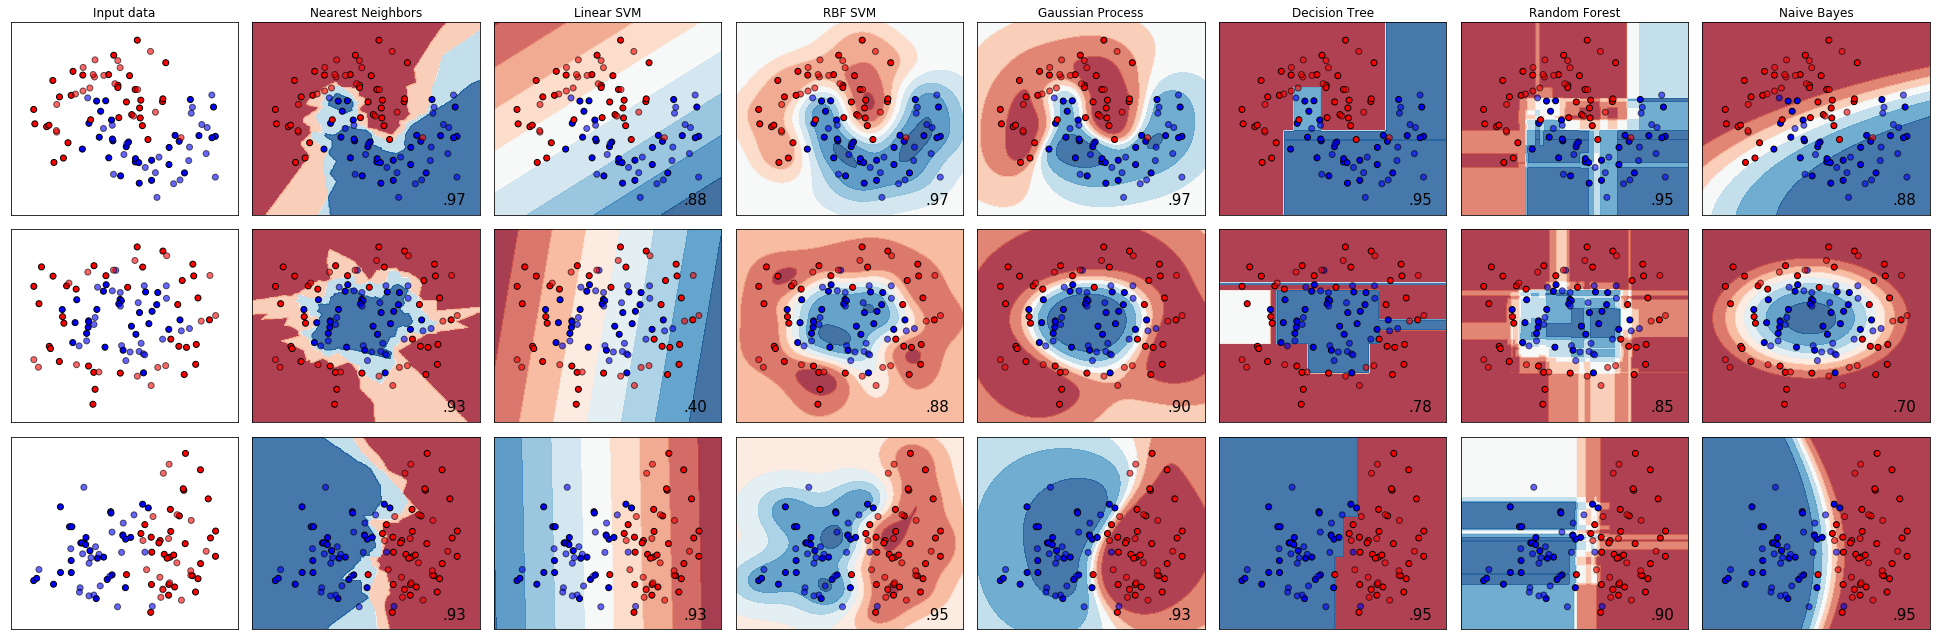

In [ ]:
%matplotlib inline


print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB()
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 

print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]



K-means Clustering

The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.




C:\Users\john.lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


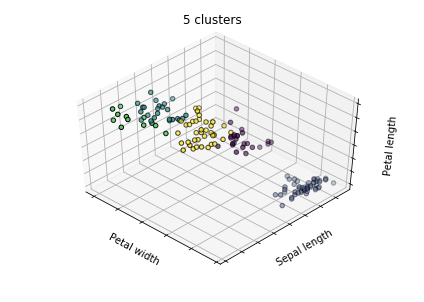

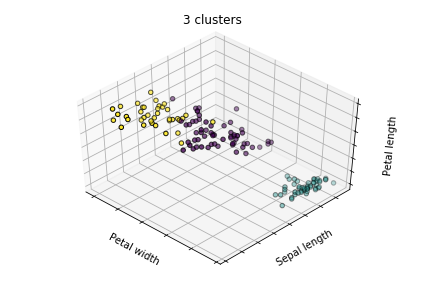

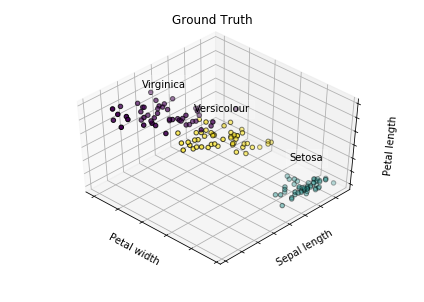

In [ ]:
%matplotlib inline
"""
=========================================================
K-means Clustering
=========================================================

The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.

"""
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_5', KMeans(n_clusters=5)),
              ('k_means_iris_3', KMeans(n_clusters=3))]
fignum = 1
titles = ['5 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    # X[:, 3], X[:, 0], X[:, 2] = Petal width, Sepal length, Petal length
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [ ]:
c=labels.astype(np.float)

In [ ]:
c

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2.,
       0., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 0.])


Demo of affinity propagation clustering algorithm

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007


Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


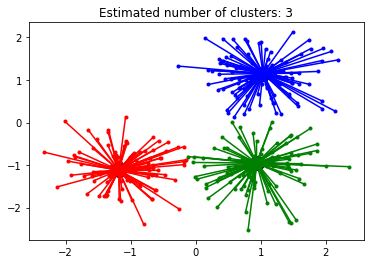

In [ ]:
%matplotlib inline
"""
=================================================
Demo of affinity propagation clustering algorithm
=================================================

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007

"""
print(__doc__)

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Demo of DBSCAN clustering algorithm

Finds core samples of high density and expands clusters from them.


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


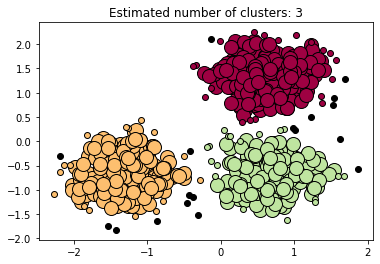

In [ ]:
%matplotlib inline
"""
===================================
Demo of DBSCAN clustering algorithm
===================================

Finds core samples of high density and expands clusters from them.

"""
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2


Compare BIRCH and MiniBatchKMeans

This example compares the timing of Birch (with and without the global
clustering step) and MiniBatchKMeans on a synthetic dataset having
100,000 samples and 2 features generated using make_blobs.

If ``n_clusters`` is set to None, the data is reduced from 100,000
samples to a set of 158 clusters. This can be viewed as a preprocessing
step before the final (global) clustering step that further reduces these
158 clusters to 100 clusters.

Birch without global clustering as the final step took 4.39 seconds
n_clusters : 158
Birch with global clustering as the final step took 3.89 seconds
n_clusters : 100
Time taken to run MiniBatchKMeans 4.57 seconds


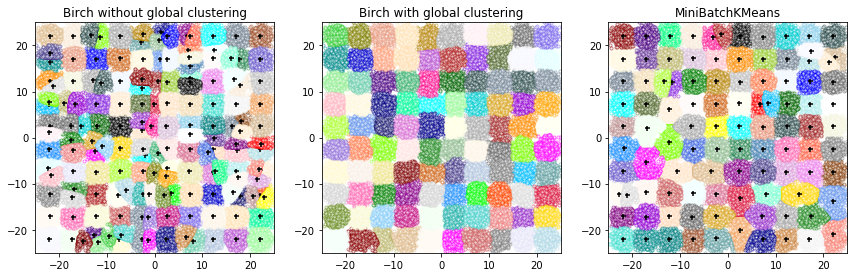

In [ ]:
%matplotlib inline
"""
=================================
Compare BIRCH and MiniBatchKMeans
=================================

This example compares the timing of Birch (with and without the global
clustering step) and MiniBatchKMeans on a synthetic dataset having
100,000 samples and 2 features generated using make_blobs.

If ``n_clusters`` is set to None, the data is reduced from 100,000
samples to a set of 158 clusters. This can be viewed as a preprocessing
step before the final (global) clustering step that further reduces these
158 clusters to 100 clusters.
"""

# Authors: Manoj Kumar <manojkumarsivaraj334@gmail.com
#          Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
# License: BSD 3 clause

print(__doc__)

from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs

# Generate centers for the blobs so that it forms a 10 X 10 grid.
xx = np.linspace(-22, 22, 10)
yy = np.linspace(-22, 22, 10)
xx, yy = np.meshgrid(xx, yy)
n_centres = np.hstack((np.ravel(xx)[:, np.newaxis],
                       np.ravel(yy)[:, np.newaxis]))

# Generate blobs to do a comparison between MiniBatchKMeans and Birch.
X, y = make_blobs(n_samples=100000, centers=n_centres, random_state=0)

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with Birch with and without the final clustering step
# and plot.
birch_models = [Birch(threshold=1.7, n_clusters=None),
                Birch(threshold=1.7, n_clusters=100)]
final_step = ['without global clustering', 'with global clustering']

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    time_ = time() - t
    print("Birch %s as the final step took %0.2f seconds" % (
          info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1],
                   c='w', edgecolor=col, marker='.', alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker='+',
                       c='k', s=25)
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title('Birch %s' % info)

# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(init='k-means++', n_clusters=100, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)
t0 = time()
mbk.fit(X)
t_mini_batch = time() - t0
print("Time taken to run MiniBatchKMeans %0.2f seconds" % t_mini_batch)
mbk_means_labels_unique = np.unique(mbk.labels_)

ax = fig.add_subplot(1, 3, 3)
for this_centroid, k, col in zip(mbk.cluster_centers_,
                                 range(n_clusters), colors_):
    mask = mbk.labels_ == k
    ax.scatter(X[mask, 0], X[mask, 1], marker='.',
               c='w', edgecolor=col, alpha=0.5)
    ax.scatter(this_centroid[0], this_centroid[1], marker='+',
               c='k', s=25)
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
ax.set_title("MiniBatchKMeans")
ax.set_autoscaley_on(False)
plt.show()

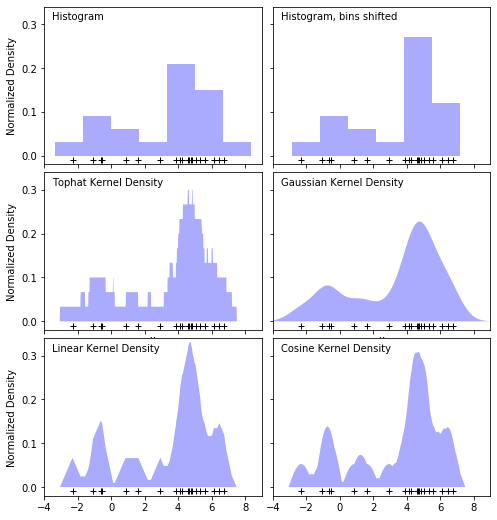

In [ ]:
%matplotlib inline
"""
===================================
Simple 1D Kernel Density Estimation
===================================
This example uses the :class:`sklearn.neighbors.KernelDensity` class to
demonstrate the principles of Kernel Density Estimation in one dimension.

The first plot shows one of the problems with using histograms to visualize
the density of points in 1D. Intuitively, a histogram can be thought of as a
scheme in which a unit "block" is stacked above each point on a regular grid.
As the top two panels show, however, the choice of gridding for these blocks
can lead to wildly divergent ideas about the underlying shape of the density
distribution.  If we instead center each block on the point it represents, we
get the estimate shown in the bottom left panel.  This is a kernel density
estimation with a "top hat" kernel.  This idea can be generalized to other
kernel shapes: the bottom-right panel of the first figure shows a Gaussian
kernel density estimate over the same distribution.
"""
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

density_param = {'density': True}

# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(3, 2, figsize=(8, 9), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.5, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

# Linear KDE
kde = KernelDensity(kernel='linear', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[2, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[2, 0].text(-3.5, 0.31, "Linear Kernel Density")

# Cosine KDE
kde = KernelDensity(kernel='cosine', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[2, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[2, 1].text(-3.5, 0.31, "Cosine Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

plt.show()

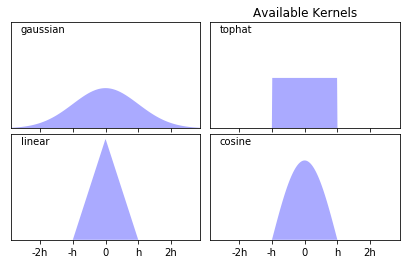

In [ ]:
%matplotlib inline
"""
===================================
Simple 1D Kernel Density Estimation
===================================
This example uses the :class:`sklearn.neighbors.KernelDensity` class to
demonstrate the principles of Kernel Density Estimation in one dimension.

Scikit-learn implements efficient kernel density estimation using either
a Ball Tree or KD Tree structure, through the
:class:`sklearn.neighbors.KernelDensity` estimator.  The available kernels
are shown in the second figure of this example.
"""
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)

def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')
plt.show()

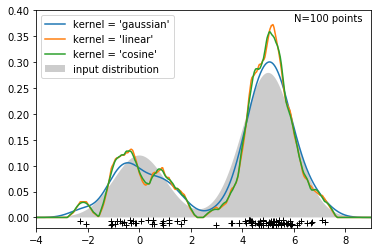

In [ ]:
%matplotlib inline
"""
===================================
Simple 1D Kernel Density Estimation
===================================
This example uses the :class:`sklearn.neighbors.KernelDensity` class to
demonstrate the principles of Kernel Density Estimation in one dimension.

The third figure compares kernel density estimates for a distribution of 100
samples in 1 dimension.  Though this example uses 1D distributions, kernel
density estimation is easily and efficiently extensible to higher dimensions
as well.
"""
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'linear', 'cosine']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()


Manifold Learning methods on a severed sphere

An application of the different :ref:`manifold` techniques
on a spherical data-set. Here one can see the use of
dimensionality reduction in order to gain some intuition
regarding the manifold learning methods. Regarding the dataset,
the poles are cut from the sphere, as well as a thin slice down its
side. This enables the manifold learning techniques to
'spread it open' whilst projecting it onto two dimensions.

For a similar example, where the methods are applied to the
S-curve dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_compare_methods.py`

Note that the purpose of the :ref:`MDS <multidimensional_scaling>` is
to find a low-dimensional representation of the data (here 2D) in
which the distances respect well the distances in the original
high-dimensional space, unlike other manifold-learning algorithms,
it does not seeks an isotropic representation of the data in
the low-dimensional space. Here the manifold problem matches fai

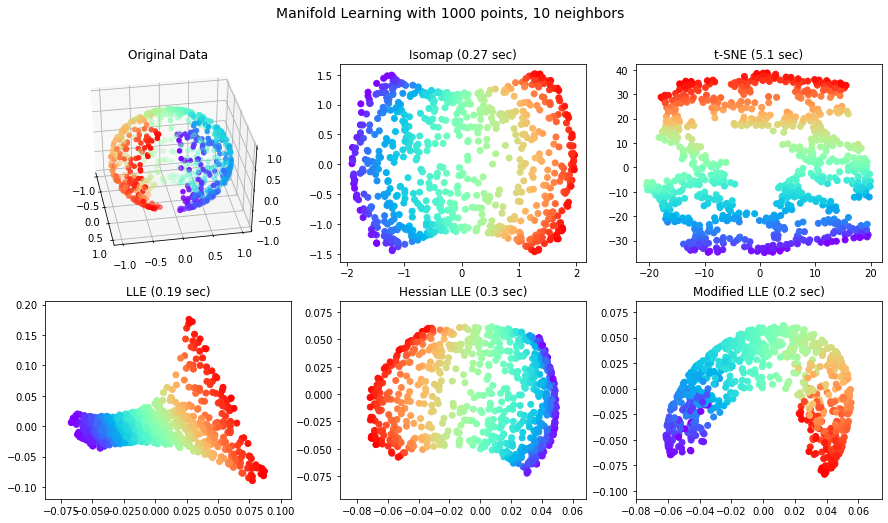

In [ ]:
%matplotlib inline
"""
=============================================
Manifold Learning methods on a severed sphere
=============================================

An application of the different :ref:`manifold` techniques
on a spherical data-set. Here one can see the use of
dimensionality reduction in order to gain some intuition
regarding the manifold learning methods. Regarding the dataset,
the poles are cut from the sphere, as well as a thin slice down its
side. This enables the manifold learning techniques to
'spread it open' whilst projecting it onto two dimensions.

For a similar example, where the methods are applied to the
S-curve dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_compare_methods.py`

Note that the purpose of the :ref:`MDS <multidimensional_scaling>` is
to find a low-dimensional representation of the data (here 2D) in
which the distances respect well the distances in the original
high-dimensional space, unlike other manifold-learning algorithms,
it does not seeks an isotropic representation of the data in
the low-dimensional space. Here the manifold problem matches fairly
that of representing a flat map of the Earth, as with
`map projection <https://en.wikipedia.org/wiki/Map_projection>`_
"""

# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

print(__doc__)

from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Next line to silence pyflakes.
Axes3D

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), np.cos(t[indices])

sphere_data = np.array([x, y, z]).T

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Plot our dataset.
axs[0,0].set_title("Original Data")
axs[0,0].get_xaxis().set_visible(False)
axs[0,0].get_yaxis().set_visible(False)
axs[0,0].set_frame_on(False)
axs[0,0] = fig.add_subplot(2,3,1,projection='3d')
axs[0,0].scatter(x, y, z, c=colors, cmap=plt.cm.rainbow)
axs[0,0].view_init(40, -10)

# Perform Locally Linear Embedding Manifold learning
methods = ['standard', 'hessian', 'modified']
labels = ['LLE', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    trans_data = manifold\
        .LocallyLinearEmbedding(n_neighbors, 2,
                                method=method).fit_transform(sphere_data).T
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    axs[1, i].scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    axs[1, i].set_title("%s (%.2g sec)" % (labels[i], t1 - t0))
    plt.axis('tight')

# Perform Isomap Manifold learning.
t0 = time()
trans_data = manifold.Isomap(n_neighbors, n_components=2)\
    .fit_transform(sphere_data).T
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

axs[0,1].scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
axs[0,1].set_title("%s (%.2g sec)" % ('Isomap', t1 - t0))
plt.axis('tight')

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

axs[0,2].scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
axs[0,2].set_title("t-SNE (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()